<a href="https://colab.research.google.com/github/Daniel010101010/DataMining/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('datadm.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[72 35]
 [66 29]
 [64  0]
 ...
 [72 23]
 [60  0]
 [70 31]]


In [6]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print(x_train)

[[62  0]
 [58 36]
 [80  0]
 ...
 [65 22]
 [74  0]
 [82  0]]


In [9]:
len(x_train)

576

In [10]:
len(x)

768

In [11]:
len(x_test)

192

In [12]:
len(y)

768

In [13]:
len(y_test)

192

In [14]:
len(y_train)

576

In [15]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[-0.40451932 -1.31921491]
 [-0.61509602  0.9287299 ]
 [ 0.54307587 -1.31921491]
 ...
 [-0.24658679  0.05452914]
 [ 0.2272108  -1.31921491]
 [ 0.64836422 -1.31921491]]


In [17]:
print(x_test)

[[ 0.33249916  1.36583027]
 [ 0.2272108   0.55407243]
 [-0.40451932 -1.31921491]
 [ 0.12192245 -0.13279959]
 [-0.24658679 -1.31921491]
 [ 0.12192245 -0.19524251]
 [ 0.43778751  0.80384407]
 [ 0.85894093  0.3667437 ]
 [-0.61509602  0.17941496]
 [ 0.12192245  0.67895825]
 [ 0.33249916  0.9287299 ]
 [ 0.33249916  0.3667437 ]
 [ 0.2272108  -1.31921491]
 [-0.93096108  0.05452914]
 [ 0.12192245  0.11697205]
 [-0.08865426 -0.07035668]
 [ 0.12192245  1.30338736]
 [-1.03624944 -0.69478579]
 [ 0.85894093  0.61651534]
 [-0.82567273  0.42918661]
 [ 0.64836422  0.67895825]
 [ 0.54307587 -1.31921491]
 [-3.66845828  0.11697205]
 [ 0.64836422  0.42918661]
 [-0.19394261 -0.38257124]
 [-0.50980767  0.67895825]
 [ 0.33249916 -1.31921491]
 [ 0.96422928  0.99117281]
 [-0.19394261  0.05452914]
 [-0.08865426 -1.31921491]
 [ 0.2272108   0.30430078]
 [-0.29923096  1.55315901]
 [ 0.85894093 -0.25768542]
 [-0.93096108  1.36583027]
 [-0.82567273 -0.50745706]
 [-0.29923096 -1.31921491]
 [ 0.75365257  0.86628699]
 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5 , metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108  22]
 [ 45  17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


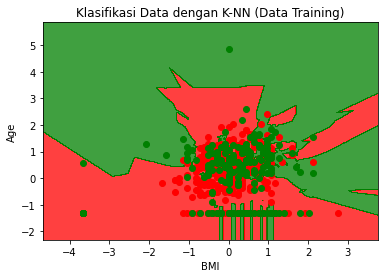

In [21]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(  ('red', 'green'))) 
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max()) 
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)') 
plt.xlabel('BMI') 
plt.ylabel('Age') 
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


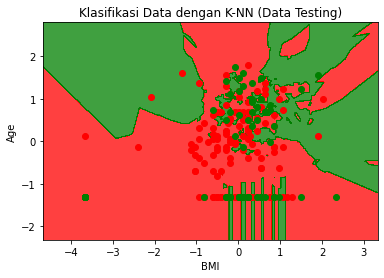

In [22]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(  ('red', 'green'))) 
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max()) 
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)') 
plt.xlabel('BMI') 
plt.ylabel('Age') 
plt.show() 